In [1]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.optimize import curve_fit
from scipy.signal import argrelextrema

## Given Data

In [6]:
V = np.linspace(330, 495, 12)

Navg = np.array([
1011,
1056,
1057.66666666667,
1076.66666666667,
1096.66666666667,
1090.66666666667,
1057,
1061.33333333333,
1063,
1038.66666666667,
1063,
1071.33333333333
])

Error = np.array([
18.3575597506858,
18.7616630392937,
18.7764628073435,
18.9443629845104,
19.1195071996,
19.0671328614335,
18.7705443004015,
18.8089813062212,
18.8237438713273,
18.6070476492705,
18.8237438713273,
18.8973837107445
])

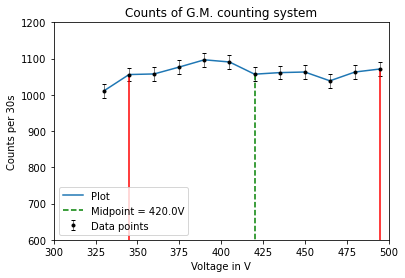

In [89]:
plt.title('Counts of G.M. counting system')
plt.ylabel('Counts per 30s')
plt.xlabel('Voltage in V')

plt.errorbar(V, Navg, yerr = Error, fmt='.k', capsize=2, elinewidth=0.5, label = "Data points")
plt.plot(V, Navg, label='Plot')
a = 1
b = 11
plt.plot(np.ones(2)*V[a], np.array([0, Navg[a]]), c='r')
plt.plot(np.ones(2)*V[b], np.array([0, Navg[b]]), c='r')
OpV = V[a]/2 + V[b]/2
plt.plot(np.ones(2)*OpV, np.array([0, Navg[(np.abs(V - OpV)).argmin()]]), '--g', label='Midpoint = ' + str(OpV) + 'V')
plt.ylim(600,1200)
plt.xlim(300,500)
plt.legend()
plt.show()

In [21]:
thickness = np.linspace(0, 0.09, 10)

counts = np.array([
10609,
9424,
8356,
6734,
6586,
5688,
5194,
4423,
3999,
3379
])

I0 = counts[0]

In [26]:
def bg_exp(x, B, lmbda):
    return B*np.exp(-lmbda*x)

popt_exp, pcov_exp = curve_fit(bg_exp, thickness, counts/I0, p0 = [1, 1])
perr_exp = np.sqrt(np.diag(pcov_exp))

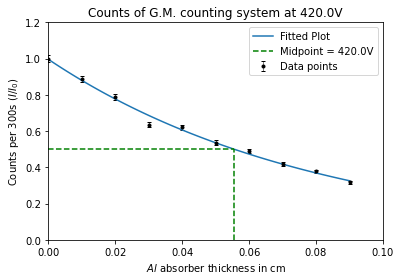

In [59]:
X = np.linspace(0, 0.09, 100)

plt.title('Counts of G.M. counting system at ' + str(OpV) + 'V')
plt.ylabel('Counts per 300s ($I/I_0$)')
plt.xlabel('$Al$ absorber thickness in cm')

plt.errorbar(thickness, counts/I0, yerr = (np.sqrt(counts)/I0 + np.sqrt(I0)*counts/I0**2), 
             fmt='.k', capsize=2, elinewidth=0.5, label = "Data points")
plt.plot(X, bg_exp(X, *popt_exp), label='Fitted Plot')
index = (np.abs(bg_exp(X, *popt_exp) - 0.5)).argmin()
plt.plot(np.array([0, X[index]]), np.ones(2)*0.5, 
         '--g', label='Midpoint = ' + str(OpV) + 'V')
plt.plot(np.ones(2)*X[index], np.array([0, bg_exp(X[index], *popt_exp)]), '--g')
plt.ylim(0,1.2)
plt.xlim(0,0.1)
plt.legend()
plt.show()

In [90]:
X[index]

0.05545454545454546

In [41]:
print("Error in I/I0",(np.sqrt(counts)/I0 + np.sqrt(I0)*counts/I0**2))

Error in I/I0 [0.01941748 0.01777476 0.0162633  0.0138976  0.01367668 0.01231427
 0.01154648 0.01031647 0.00962041 0.0085715 ]


In [94]:
np.exp(-popt_exp[1]*X[index])
print('$\mu$ = ',popt_exp[1]/rho)
print(perr_exp[1]/rho)

$\mu$ =  4.601142066977977
0.1523588000207318


In [62]:
def lin_fit(x, m, c):
    return m*x + c

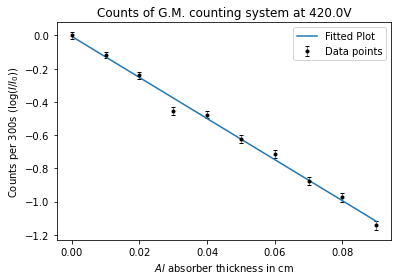

In [76]:
plt.title('Counts of G.M. counting system at ' + str(OpV) + 'V')
plt.ylabel('Counts per 300s ($\log(I/I_0)$)')
plt.xlabel('$Al$ absorber thickness in cm')

Y = np.log(counts/I0)

popt_lin, pcov_lin = curve_fit(lin_fit, thickness, Y)
perr_lin = np.sqrt(np.diag(pcov_lin))

plt.errorbar(thickness, Y, yerr = I0/counts*(np.sqrt(counts)/I0 + np.sqrt(I0)*counts/I0**2), 
             fmt='.k', capsize=2, elinewidth=0.5, label = "Data points")
plt.plot(X, lin_fit(X, *popt_lin), label='Fitted Plot')
plt.legend()
plt.show()

In [79]:
print("Error in I/I0",(I0/counts*(np.sqrt(counts)/I0 + np.sqrt(I0)*counts/I0**2)))

Error in I/I0 [0.01941748 0.02000981 0.02064832 0.0218948  0.02203096 0.02296803
 0.02358425 0.02474506 0.0255221  0.02691181]


In [95]:
print('slope = ', -popt_lin[0]/rho)

slope =  4.580023532374758


In [103]:
perr_lin[0]

0.37190745606872855

In [93]:
rho = 2.7
print('Mass absorption coefficient', popt_exp[1]/rho, -popt_lin[0]/rho)

Mass absorption coefficient 4.601142066977977 4.580023532374758


In [118]:
s = 39768.3656023258
sx = 1561.86896785061
sy = -16951.7547600962
sxx = 93.1699694665176
sxy = -1007.62557086692

In [119]:
Delta = s*sxx - sx**2
a = (sxx*sy - sx*sxy)/Delta
b = (s*sxy - sx*sy)/Delta

In [120]:
error_a = np.sqrt(sxx/Delta)
error_b = np.sqrt(s/Delta)
print(error_a, error_b)

0.008579429157921903 0.1772512421453052


In [121]:
print(a,b)

-0.004436277168119891 -10.740549695949717


In [122]:
np.sqrt(s/(s/0.371**2)), Delta

(0.371, 1265782.7361672735)